# Assignment 2

# Part 1 
### Iris Dataset

#### Loading the dataset

In [2]:
import pandas as pd
url ="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_df = pd.read_csv(url, header=None, names=["SepalLength", "SepalWidth","PetalLength", "PetalWidth", "Name"])

## 1.1 Summary Statistics

#### Looking at the dataset

In [3]:
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**4 features - **
1) Sepal length 
2) Sepal width
3) Petal length 
4) Petal width 
**all numeric.**


Compute and display summary statistics for each numeric feature available in the dataset. These must include the minimum value, maximum value, mean, standard deviation, count, and 25:50:75% percentiles.

In [4]:
iris_stats_df = pd.DataFrame()
for column in iris_df.select_dtypes(include='number').columns:
    iris_stats_df[column] = iris_df[column].describe()
iris_stats_df

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


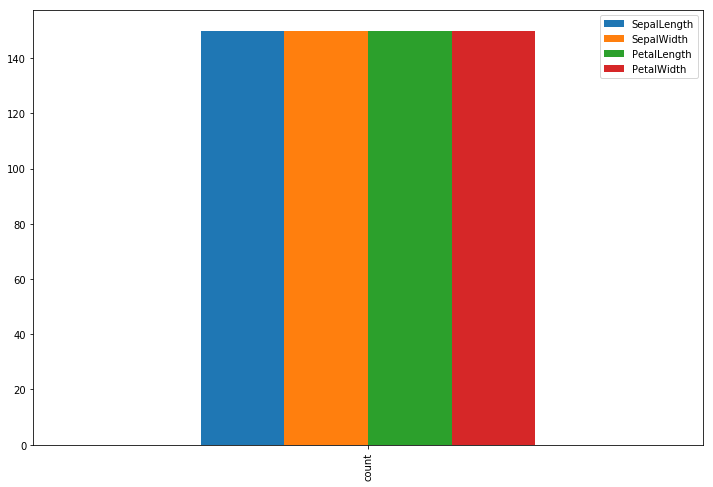

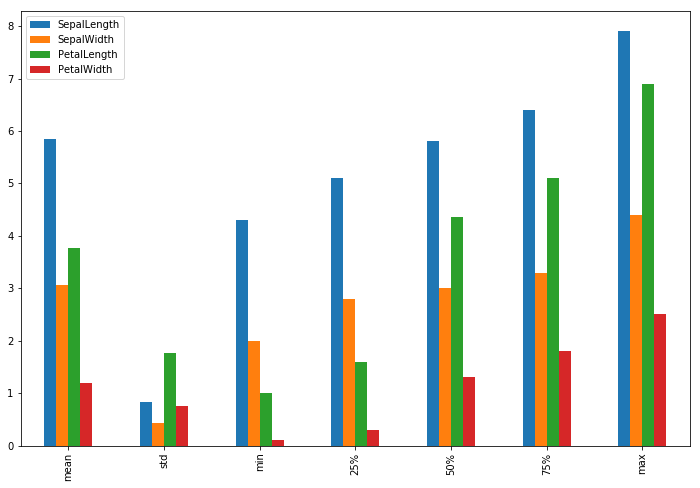

In [17]:
import matplotlib.pyplot as plt
iris_stats_df[:1].plot(kind='bar', figsize=(12, 8))
iris_stats_df[1:].plot(kind='bar', figsize=(12, 8))

## 1.2 Data Visualization

**Histograms:** To illustrate the feature distributions, create a histogram for each numeric feature in the dataset. You may plot each histogram individually or combine them all into a single plot. When generating histograms for this assignment, use the default number of bins. Recall that a histogram provides a graphical representation of the distribution of the data.

In [18]:
import seaborn as sns
sns.set(style="white", color_codes=True)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11638a828>,
      dtype=object)

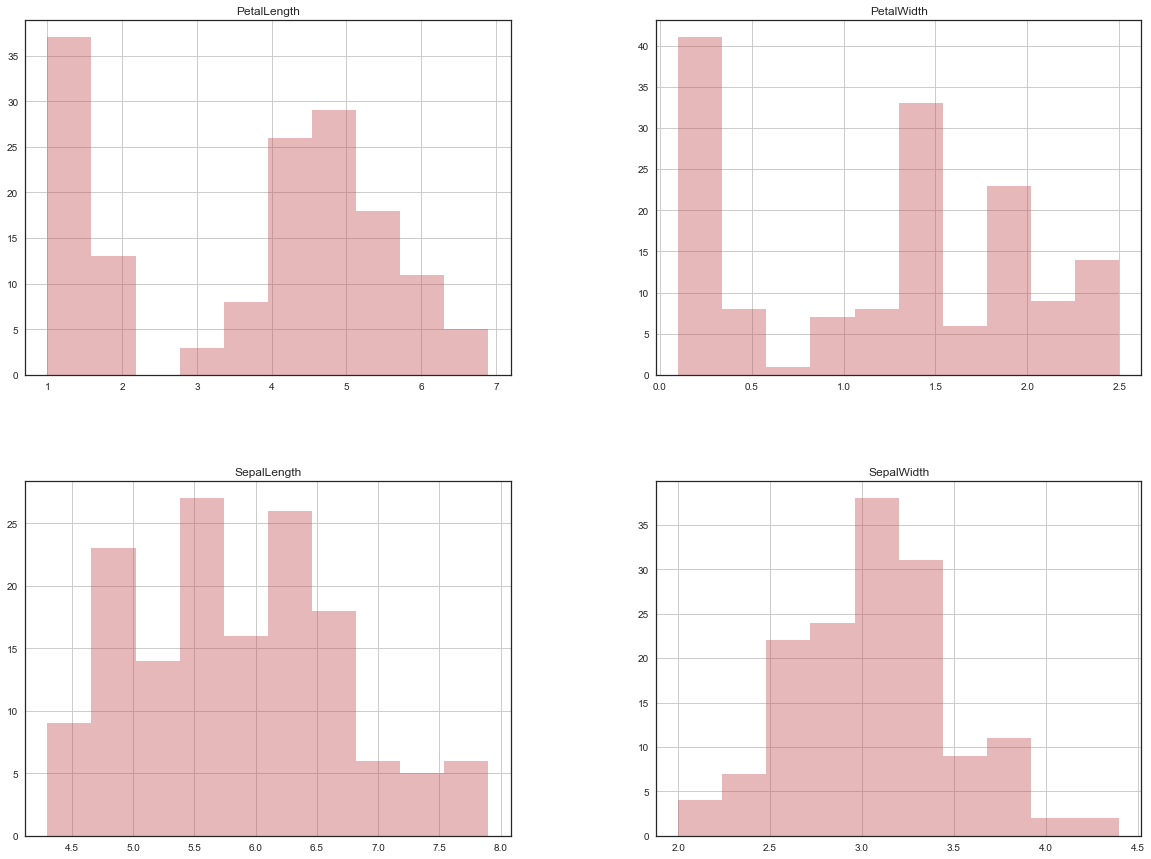

In [23]:
iris_df.hist(color='r',alpha=0.4,  figsize=(20,15))

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


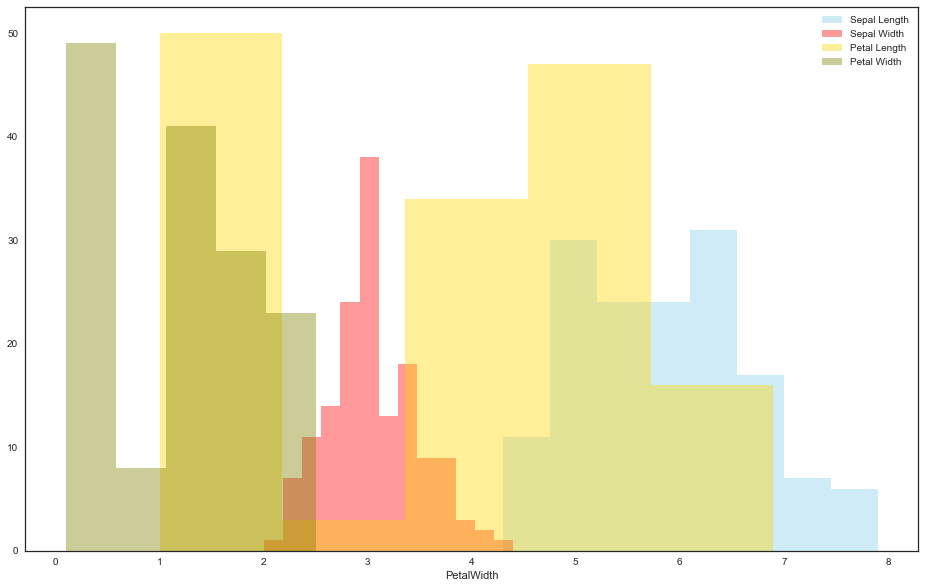

In [25]:
plt.figure(figsize=(16, 10))
sns.distplot(iris_df["SepalLength"], color="skyblue", label="Sepal Length", kde=False)
sns.distplot(iris_df["SepalWidth"], color="red", label="Sepal Width", kde=False)
sns.distplot(iris_df["PetalLength"], color="gold", label="Petal Length", kde=False)
sns.distplot(iris_df["PetalWidth"], color="olive", label="Petal Width", kde=False)
plt.legend()

# I agree that this histogram looks terrible


**Box Plots:** To further assess the data, create a box plot for each numeric feature in the dataset. All of the box plots will be combined into a single plot. Recall that a box plot provides a graphical representation of the location and variation of the data through their quartiles; they are especially useful for comparing distributions and identifying outliers.

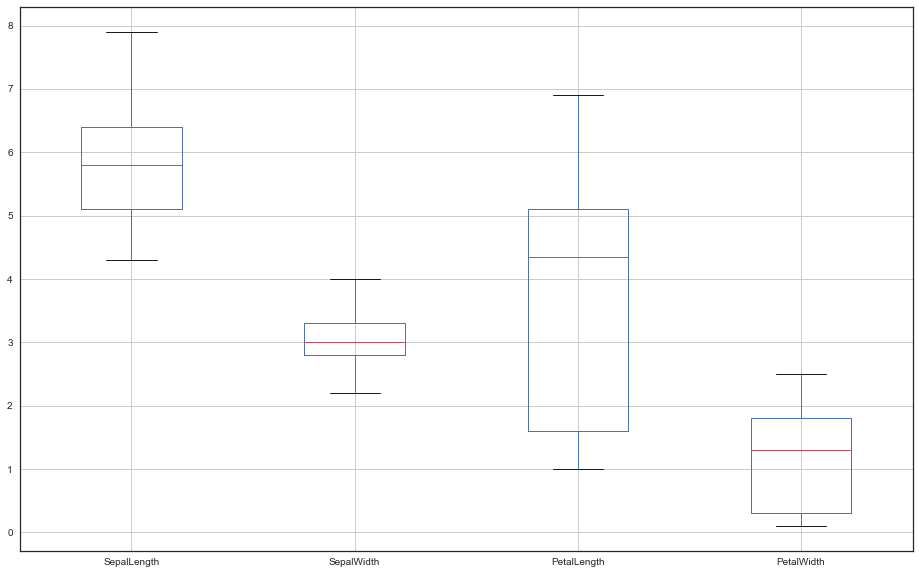

In [26]:
iris_df.boxplot(figsize=(16,10))

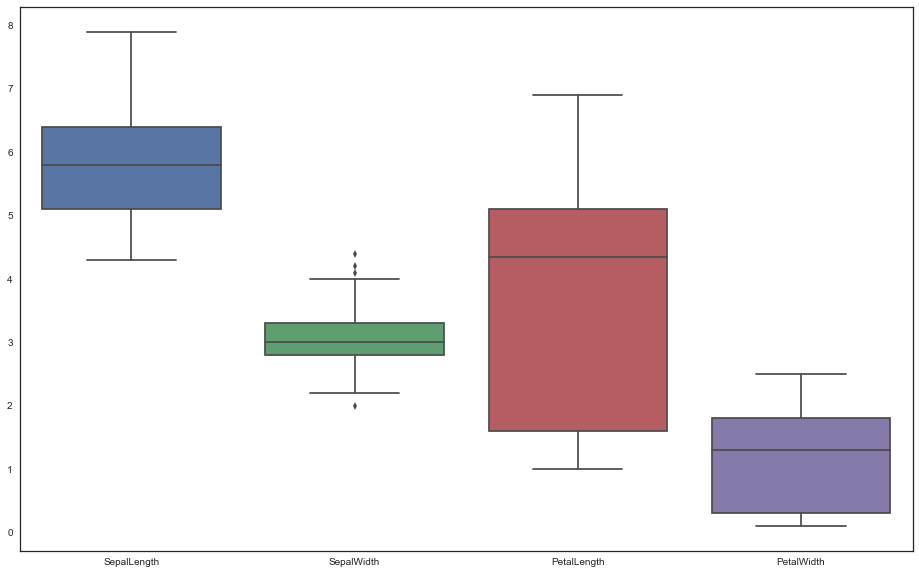

In [27]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=iris_df)

It is evident that the Sepal Width has a lot of outliers.

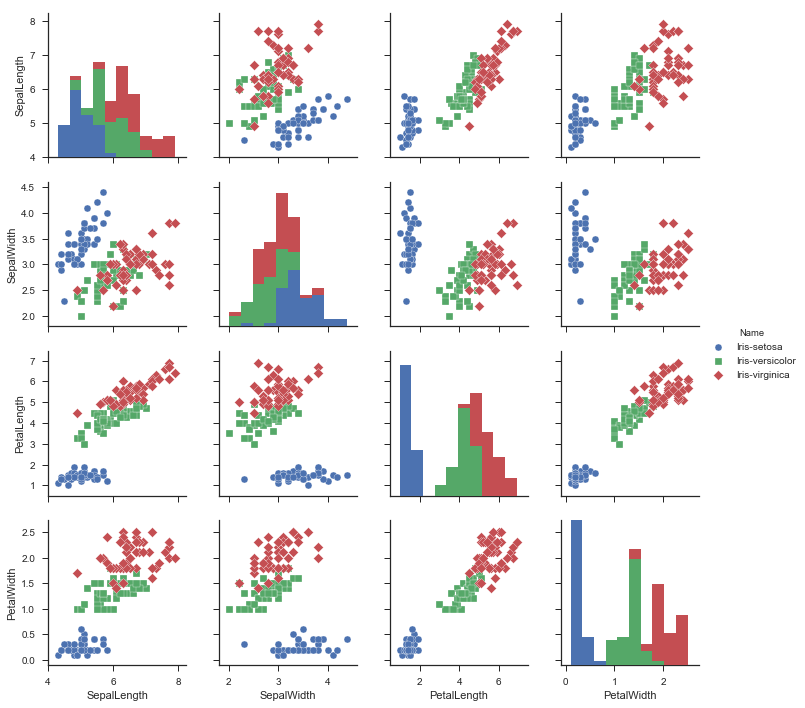

In [28]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris_df, hue="Name", markers=["o", "s", "D"])


# Part 2
### Ames, Iowa Housing Dataset

In [29]:
import numpy as np

In [30]:
pd.set_option("display.max_columns", 100)
url ="https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/AmesHousing.txt"
housing_df = pd.read_csv(url, sep="\t")

## 2.1
### Imputation

Taking a glance at the data

In [31]:
housing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
len(housing_df.columns)

82

How many features have missing values?

In [33]:
null_value_columns = housing_df.columns[housing_df.isnull().any()].tolist()
len(null_value_columns)

27

The following 27 features have missing values : 

In [34]:
null_value_columns

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

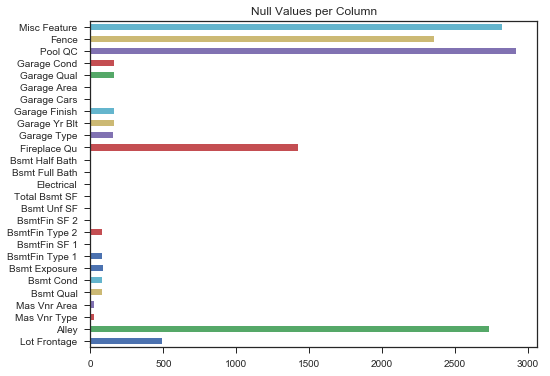

In [35]:
plt.figure(figsize=(8, 6))
nulls = housing_df[null_value_columns].isnull().sum()
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()

Fill each missing nominal feature value with the string “Missing”.
Interpolate each missing numeric feature value using linear interpolation.

In [36]:
numeric_input = pd.DataFrame()
for x in housing_df.columns:
    if housing_df[x].isnull().values.any() == True:
        if housing_df[x].dtype == "object":
            housing_df[x] = housing_df[x].fillna("Missing")
        else:
            housing_df[x] = housing_df[x].interpolate()
            

Checking if any features have missing values after updation: 

In [37]:
len(housing_df.columns[housing_df.isnull().any()].tolist())

0

## 2.2
### Standardization

Standardize the imputed feature data so that the values of each numeric feature are standard normally distributed (i.e., each feature is Gaussian with zero mean and unit variance). Note that scikit-learn may be used to perform feature standardization.
 Visualize the results using box plots. How do the plots differ from box plots made before feature standardization? Which feature has the outlier furthest from the mean before and after standardization?

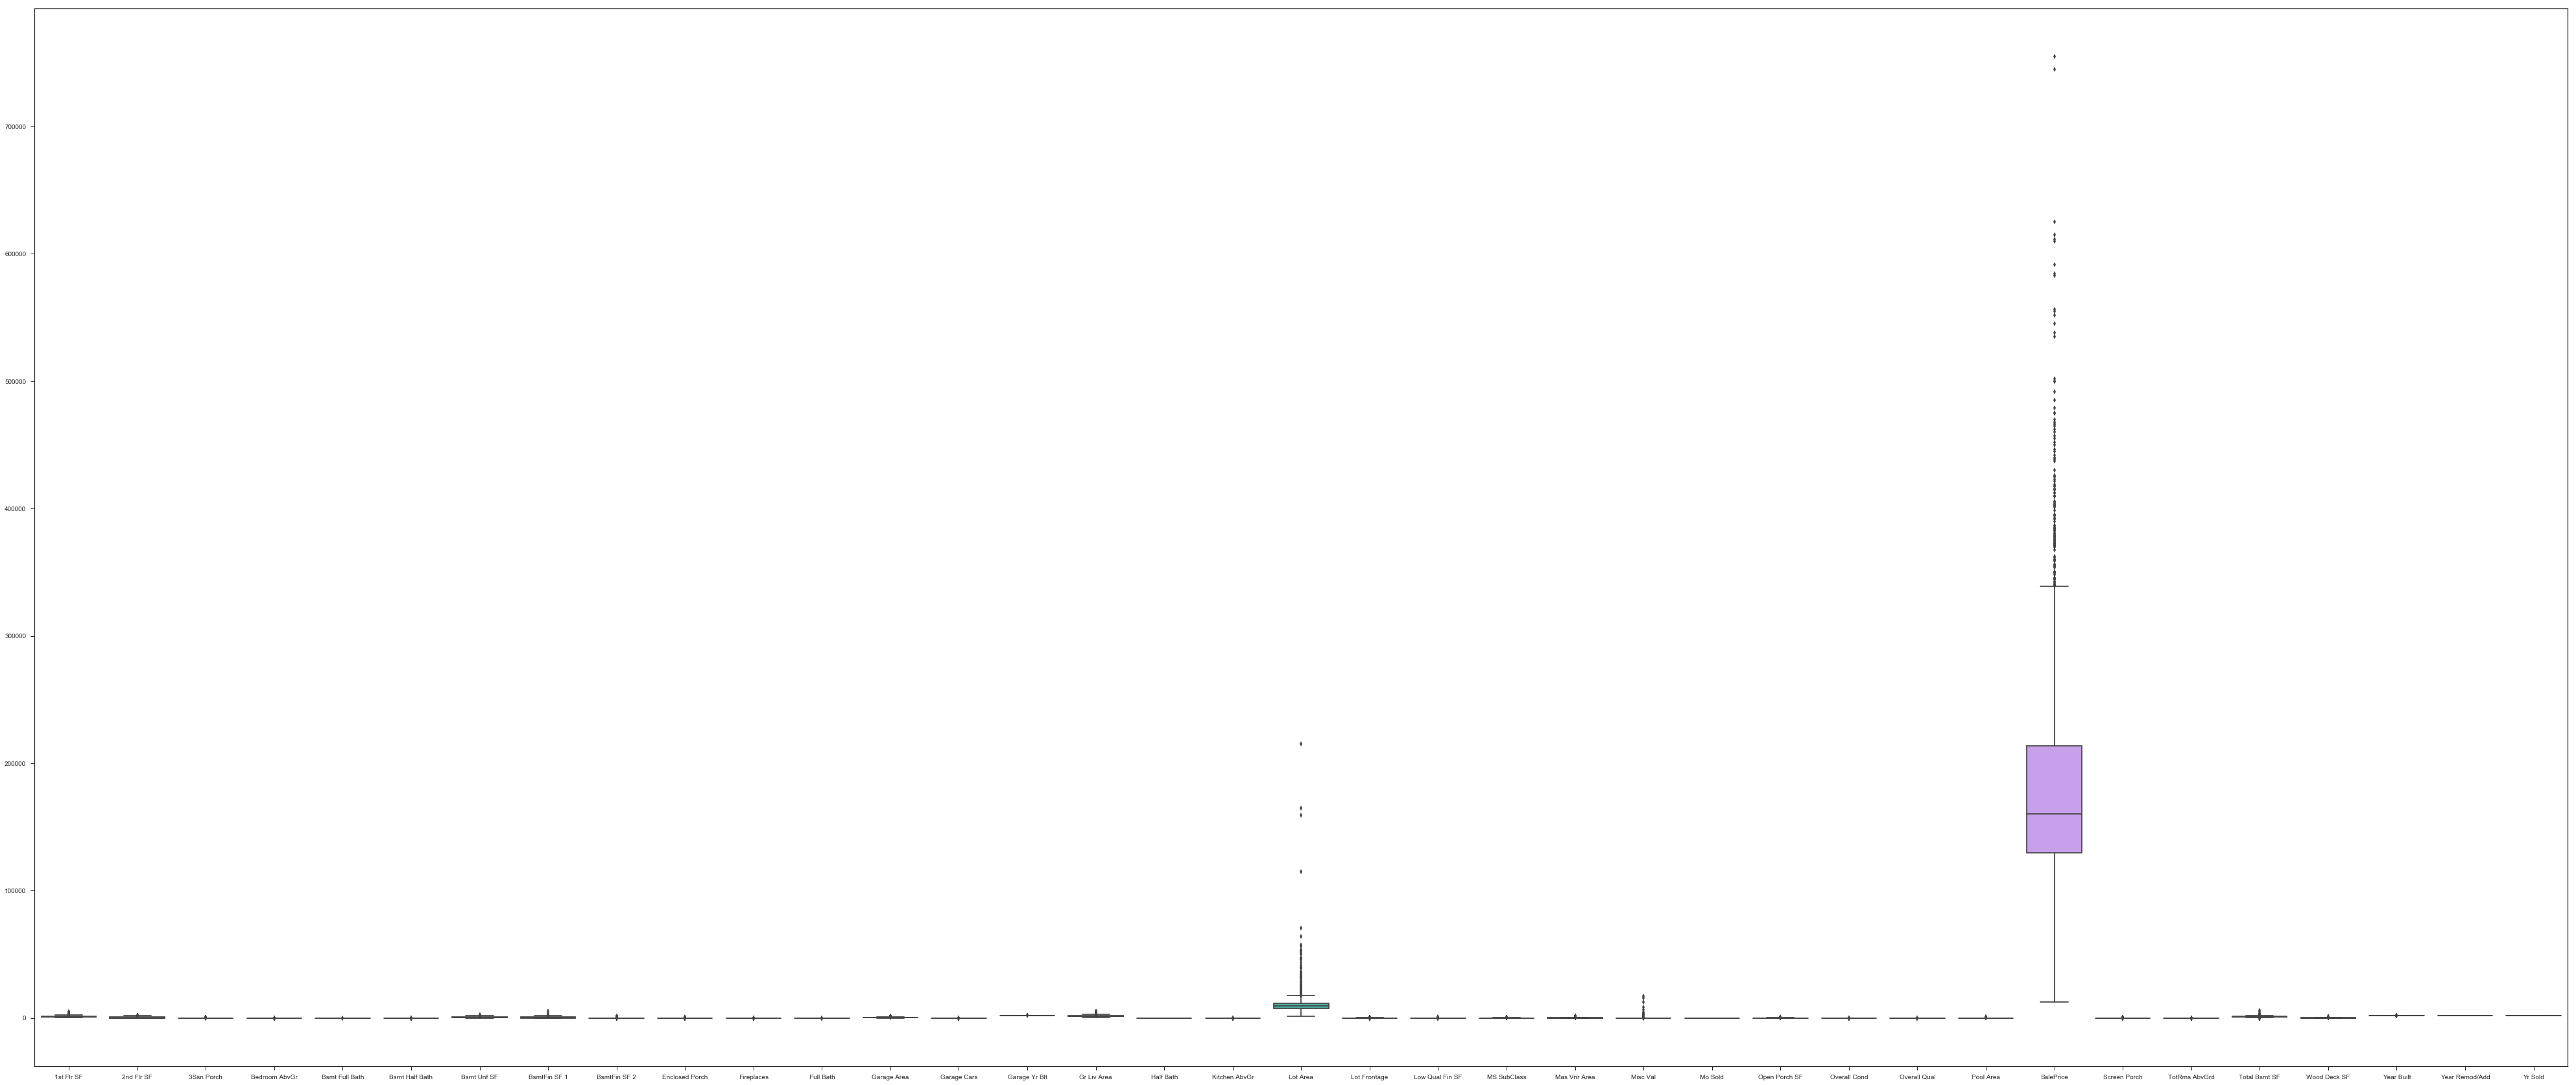

In [38]:
to_exclude = ['Order', 'PID']
plt.figure(figsize=(70, 30))
sns.boxplot(data=housing_df.loc[:, housing_df.columns.difference(to_exclude)])

In [39]:
import sklearn.preprocessing
housing_df = housing_df.drop('Order', axis=1)
housing_df = housing_df.drop('PID', axis=1)
for x in housing_df.columns:
    if housing_df[x].dtype == "object":
        continue
    else:
        housing_df[x] = sklearn.preprocessing.scale(housing_df[x].astype(float))

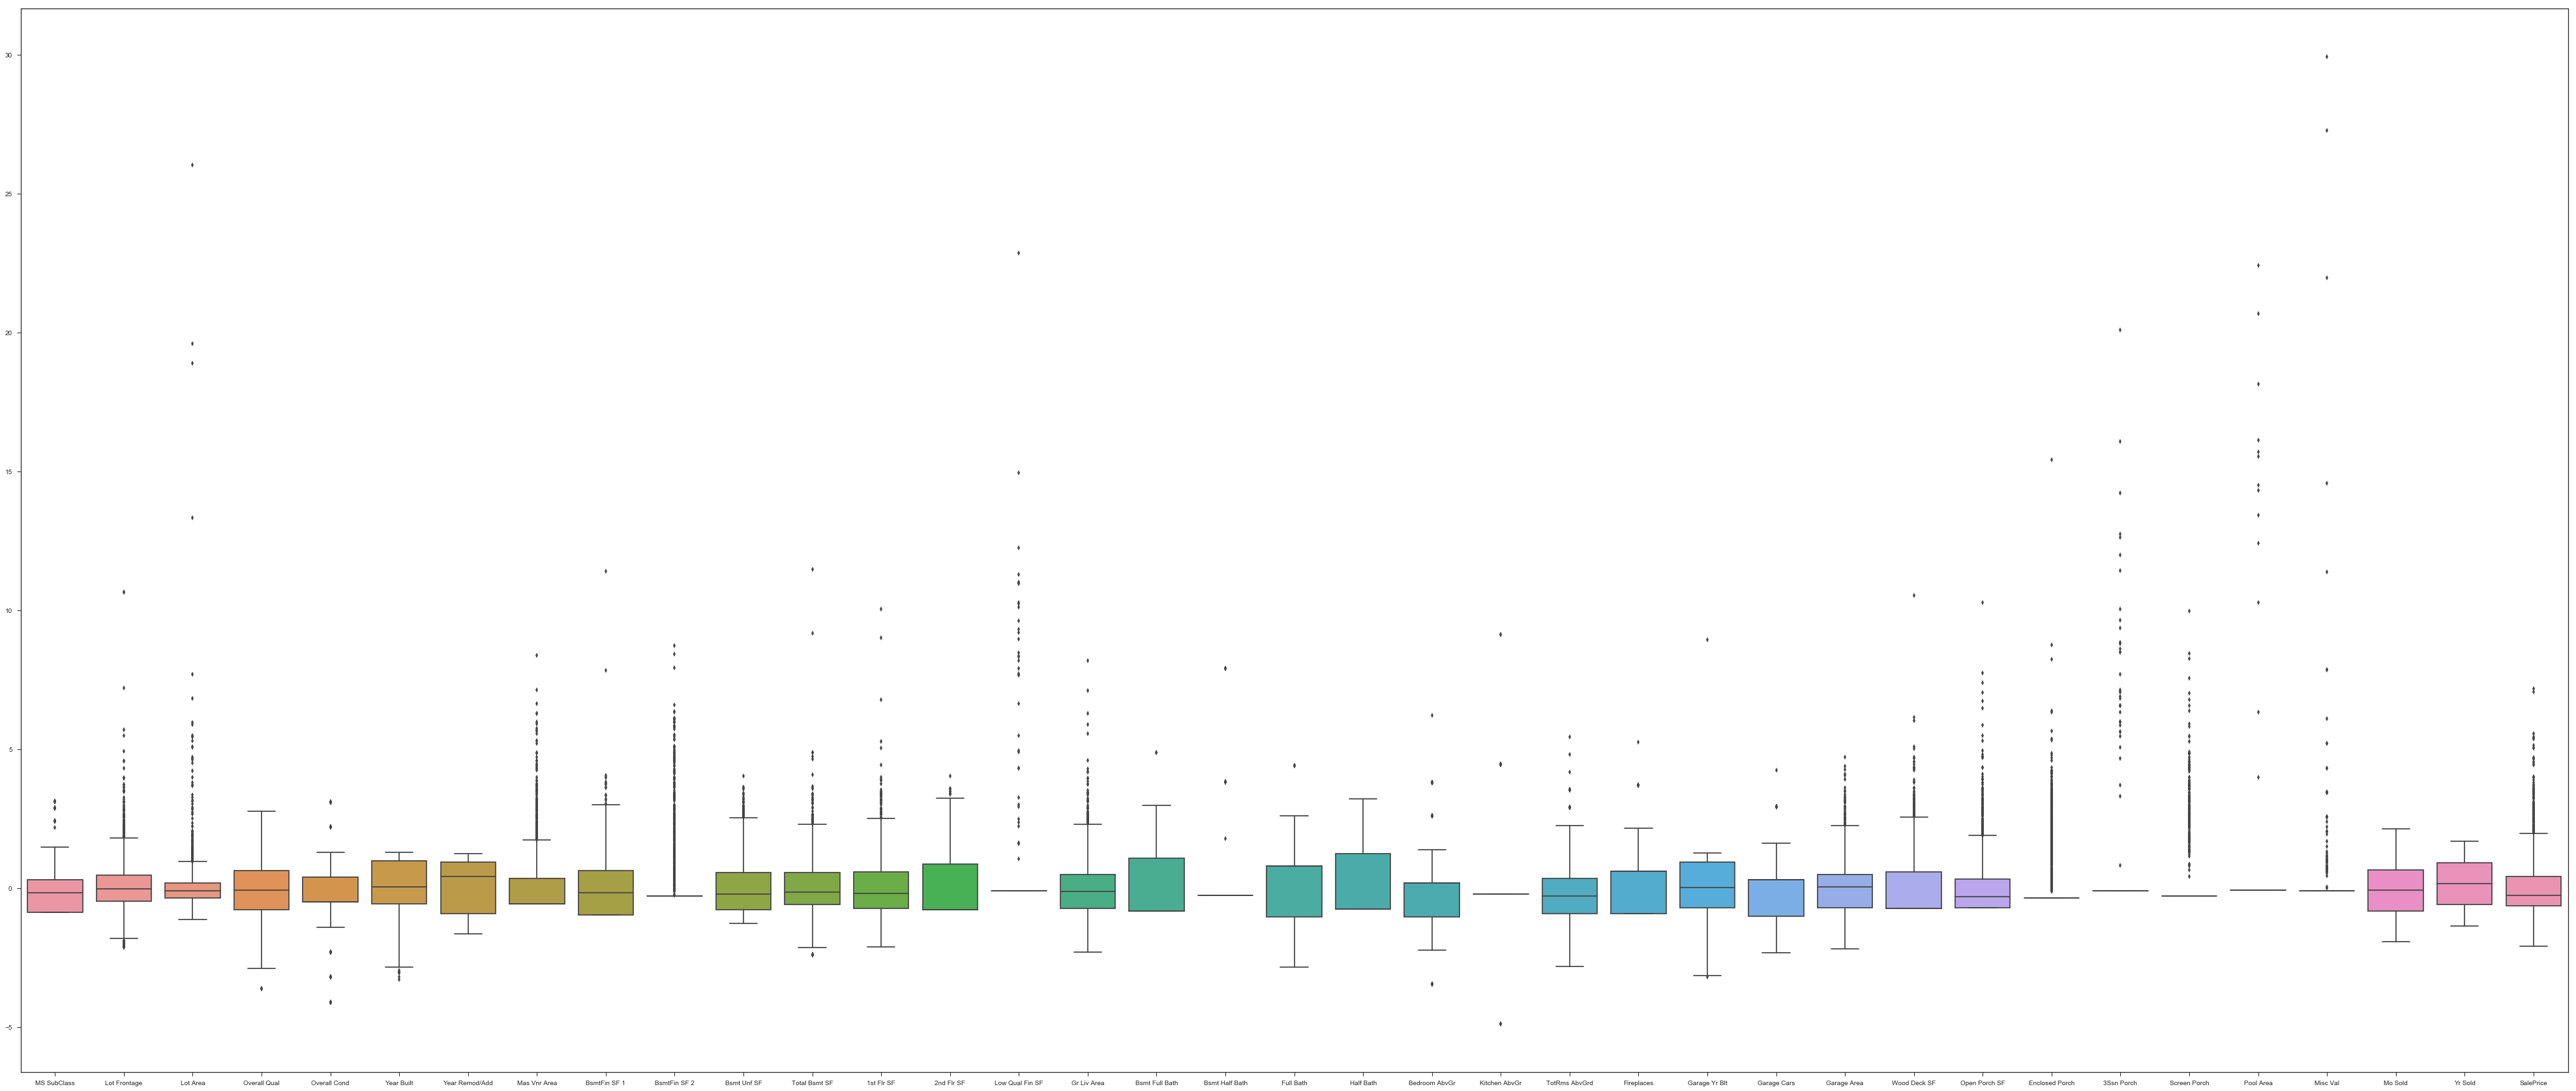

In [40]:
plt.figure(figsize=(70, 30))
sns.boxplot(data=housing_df)

**How do the plots differ from box plots made before feature standardization? Which feature has the outlier furthest from the mean before and after standardization?**

1) It is evident that all the box plots of all the features are now clearly visible
2) The scale of the boxplots is vastly different. The boxplot without standardization goes up to 7x10^5 where as after standardization, the max value is barely ~ 30. 
This makes sense because we are essentially standardising our features because the raw values of our features vary greatly and we need to be able to get them into the same range for making some objective decisions. 

It seems to me that **SalePrice** has outliers farthest away from the mean before standarization and **MiscValue** has outliers furthest away from the mean after. 

## 2.3
### Feature Selection

To get an idea of their relative importance, estimate the mutual information between the numeric features and the class column, ‘SalePrice’. Note that scikit-learn may be used to estimate mutual information

In [41]:
import sklearn.feature_selection
housing_df['SalePrice'] = housing_df['SalePrice'].astype(int)
housing_numeric_features = pd.DataFrame()
for x in housing_df.columns:
    if housing_df[x].dtype == "object":
        continue
    else:
        housing_numeric_features[x] = housing_df[x]
        # print(sklearn.feature_selection.mutual_info_classif(df2[x], df2['SalePrice']))
        

In [42]:
housing_numeric_features = housing_numeric_features.drop('SalePrice', axis=1)

In [43]:
mutual_information = sklearn.feature_selection.mutual_info_regression(housing_numeric_features, housing_df['SalePrice'], random_state=0)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [44]:
mutual_information

array([1.12873628e-01, 1.17614422e-01, 1.04927049e-01, 3.34411741e-01,
       6.48357282e-02, 1.69823459e-01, 1.29443280e-01, 1.12330497e-01,
       1.28993242e-01, 3.80045553e-03, 4.16180331e-02, 2.23338787e-01,
       1.96800036e-01, 8.77756615e-02, 0.00000000e+00, 2.34478119e-01,
       4.17447142e-02, 1.97010075e-04, 7.40895076e-02, 3.50280721e-02,
       2.74582919e-02, 1.15924732e-02, 1.16853179e-01, 9.62042419e-02,
       1.58013409e-01, 2.22633152e-01, 2.12634443e-01, 7.84655477e-02,
       8.50292998e-02, 2.43525173e-02, 2.65203378e-02, 2.76552684e-03,
       2.59660387e-02, 2.30215984e-03, 0.00000000e+00, 9.61595873e-04])

In [45]:
mutual_information_df = pd.DataFrame()
counter = 0
for x in housing_numeric_features.columns:
    mutual_information_df[x]= [mutual_information[counter]]
    counter += 1

In [46]:
mutual_information_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0.112874,0.117614,0.104927,0.334412,0.064836,0.169823,0.129443,0.11233,0.128993,0.0038,0.041618,0.223339,0.1968,0.087776,0.0,0.234478,0.041745,0.000197,0.07409,0.035028,0.027458,0.011592,0.116853,0.096204,0.158013,0.222633,0.212634,0.078466,0.085029,0.024353,0.02652,0.002766,0.025966,0.002302,0.0,0.000962


What are the top 5 numeric features ranked by mutual information? Note that features with a higher estimated mutual information are considered more informative.

In [48]:
mutual_information_df.iloc[0].nlargest()

Overall Qual     0.334412
Gr Liv Area      0.234478
Total Bsmt SF    0.223339
Garage Cars      0.222633
Garage Area      0.212634
Name: 0, dtype: float64

**How do you expect the values for the top-ranked feature to affect the sales price (i.e., would you expect the sales price to increase when its values go up or down)? Why?**

I would assume that the sales price will increase when the mutual information with the overall quality goes up and vice versa. That is because, in my opinion, I have analysed the data to see what features are affecting my price the most. And since this is +ve, the change will also be positive.


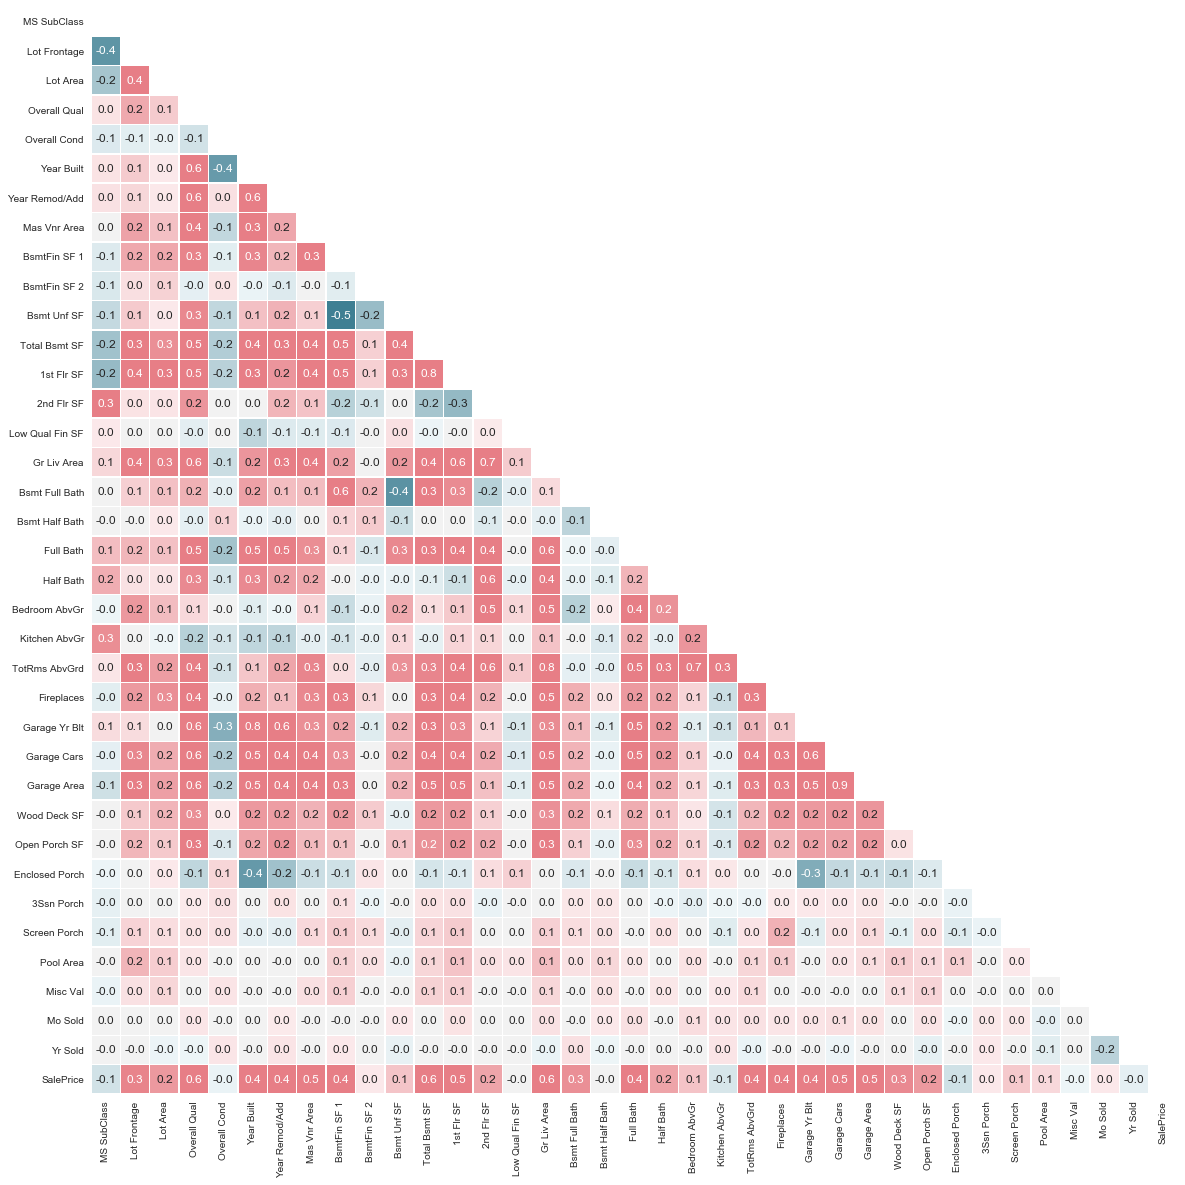

In [50]:
sns.set(style="white")
corr = housing_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(35,20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cbar=False)

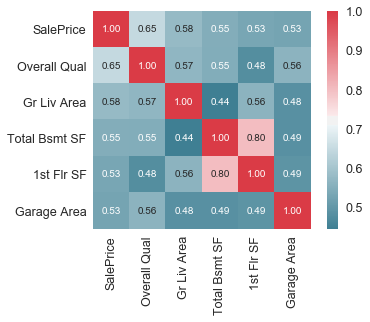

In [52]:
k = 6
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, annot=True, square=True, fmt='.2f', cmap=cmap,
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)